Please see the official YOLOv5 Colab Notebook below, and visit the Train Custom Data Tutorial to get started with YOLOv5.

URL : https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=wbvMlHd_QwMG

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo

%cd yolov5

Setup complete. Using torch 1.8.1+cu101 (Tesla K80)


In [ ]:
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [16]:
!mkdir -p Dataset/FaceMask/Images
!mkdir -p Dataset/FaceMask/Labels

!mkdir -p Dataset/images Dataset/labels

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"athulmathewkonoor","key":"21127855c233d5b674326cffaf352821"}'}

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d andrewmvd/face-mask-detection -p /content/sample_data/ --unzip

 98% 389M/398M [00:06<00:00, 62.3MB/s]
100% 398M/398M [00:06<00:00, 60.0MB/s]


In [7]:
!cp -rf /content/sample_data/images/* Dataset/FaceMask/Images

print("Images in Dataset Folder...")

Images in Dataset Folder...


In [8]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [17]:
FILE_ROOT = "/content/sample_data/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "/content/yolov5/Dataset/"
LABELS_ROOT = DATA_ROOT + "FaceMask/Labels"
IMAGES_ROOT = DATA_ROOT + "FaceMask/Images"  

DEST_IMAGES_PATH = "images"
DEST_LABELS_PATH = "labels" 

In [10]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

In [11]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    save_file_name = LABELS_ROOT + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = classes.index(box[0])

        new_box = cord_converter(size, box[1:])

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        # print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [12]:
files = os.listdir(ANNOTATIONS_PATH)

for file in files:
    # print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

print("COCO FORMAT READY....")

/content/sample_data/annotations/maksssksksss130.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss130.txt
/content/sample_data/annotations/maksssksksss276.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss276.txt
/content/sample_data/annotations/maksssksksss429.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss429.txt
/content/sample_data/annotations/maksssksksss285.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss285.txt
/content/sample_data/annotations/maksssksksss766.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss766.txt
/content/sample_data/annotations/maksssksksss742.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss742.txt
/content/sample_data/annotations/maksssksksss526.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss526.txt
/content/sample_data/annotations/maksssksksss583.xml
/content/yolov5/Dataset/FaceMask/Labels/maksssksksss583.txt
/content/sample_data/annotations/maksssksksss191.xml
/content/yolov5/Dataset/FaceMask/Labels/mak

In [13]:
from sklearn.model_selection import train_test_split

image_list = os.listdir('/content/yolov5/Dataset/FaceMask/Images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=7)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=8)

print('total count :',len(image_list))
print('train :',len(train_list))
print('validation   :',len(val_list))

total count : 853
train : 682
validation   : 85


In [18]:
def move_data(file_list, img_labels_root, imgs_source, type):

    root_file = Path(DATA_ROOT + DEST_IMAGES_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    root_file = Path(DATA_ROOT + DEST_LABELS_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        # Copy image
        DICT_DIR = DATA_ROOT + DEST_IMAGES_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = DATA_ROOT + DEST_LABELS_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [19]:
move_data(train_list, LABELS_ROOT, IMAGES_ROOT, "train")
move_data(val_list,   LABELS_ROOT, IMAGES_ROOT, "val")
move_data(test_list,  LABELS_ROOT, IMAGES_ROOT, "test")

In [20]:
!echo "train: /content/yolov5/Dataset/images/train" >> data/facemask.yaml
!echo "val:   /content/yolov5/Dataset/images/val" >> data/facemask.yaml
!echo "nc : 3" >> data/facemask.yaml
!echo "names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']" >> data/facemask.yaml

!cat data/facemask.yaml

train: /content/yolov5/Dataset/images/train
val:   /content/yolov5/Dataset/images/val
nc : 3
names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']


In [21]:
! pip install -r /content/yolov5/requirements.txt

In [18]:
! pip install -U PyYAML

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.7/dist-packages (5.4.1)


In [22]:
!python train.py --img 320 --batch 16 --epochs 30 --data /content/yolov5/data/facemask.yaml --cfg /content/yolov5/models/yolov5s.yaml --weights /content/yolov5/yolov5s.pt

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5s.yaml', data='/content/yolov5/data/facemask.yaml', device='', entity=None, epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[320, 320], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='/content/yolov5/yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-22 12:22:45.967856: I tensorflow/str

Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 3/3 [00:03<00:00,  1.19s/it]
                 all          85         389       0.922       0.525       0.601       0.358
           With_Mask          85         318       0.923       0.849       0.909       0.588
        Without_Mask          85          66       0.841       0.727       0.833       0.439
      Incorrect_Mask          85           5           1           0      0.0598      0.0459
30 epochs completed in 0.263 hours.

In [23]:
!cp /content/yolov5/runs/train/exp/weights/best.pt weights

In [24]:
!python /content/yolov5/detect.py --source /content/yolov5/Dataset/images/test --img-size 320 --conf 0.4 --weights /content/yolov5/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=320, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/yolov5/Dataset/images/test', update=False, view_img=False, weights=['/content/yolov5/weights/best.pt'])
YOLOv5 🚀 v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/86 /content/yolov5/Dataset/images/test/maksssksksss10.png: 320x256 1 With_Mask, Done. (0.019s)
image 2/86 /content/yolov5/Dataset/images/test/maksssksksss103.png: 256x320 4 With_Masks, Done. (0.019s)
image 3/86 /content/yolov5/Dataset/images/test/maksssksksss105.png: 224x320 9 With_Masks, Done. (0.019s)
image 4/86 /content/yolov5/Dataset/images/test/maksssksksss109.png: 320x320 1 With_Mask, Done. (0.

In [ ]:
from google.colab import files

files.download("/content/yolov5/weights/best.pt")

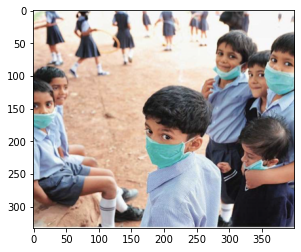

In [25]:
from glob import glob
import matplotlib.pyplot as plt
from IPython.display import Image

testfiles = glob('/content/yolov5/runs/detect/exp/*')

img = plt.imread(IMAGE_PATH + "/maksssksksss698.png") 
plt.imshow(img)    
plt.show()

In [32]:
!python detect.py --source "/content/sample_data/images/maksssksksss597.png" --img-size 320 --conf 0.4 --weights /content/yolov5/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=320, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/sample_data/images/maksssksksss597.png', update=False, view_img=False, weights=['/content/yolov5/weights/best.pt'])
YOLOv5 🚀 v5.0-108-g19100ba torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/sample_data/images/maksssksksss597.png: 224x320 2 With_Masks, Done. (0.021s)
Results saved to runs/detect/exp4
Done. (0.042s)


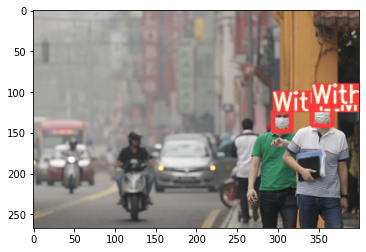

In [33]:
img = plt.imread("/content/yolov5/runs/detect/exp4/maksssksksss597.png") 
plt.imshow(img)    
plt.show()

In [34]:
!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/models/ (stored 0%)
  adding: content/yolov5/models/export.py (deflated 68%)
  adding: content/yolov5/models/yolov5l.yaml (deflated 62%)
  adding: content/yolov5/models/yolo.py (deflated 64%)
  adding: content/yolov5/models/__pycache__/ (stored 0%)
  adding: content/yolov5/models/__pycache__/experimental.cpython-37.pyc (deflated 51%)
  adding: content/yolov5/models/__pycache__/yolo.cpython-37.pyc (deflated 45%)
  adding: content/yolov5/models/__pycache__/common.cpython-37.pyc (deflated 59%)
  adding: content/yolov5/models/__pycache__/__init__.cpython-37.pyc (deflated 25%)
  adding: content/yolov5/models/yolov5s.yaml (deflated 62%)
  adding: content/yolov5/models/experimental.py (deflated 65%)
  adding: content/yolov5/models/yolov5m.yaml (deflated 62%)
  adding: content/yolov5/models/yolov5x.yaml (deflated 62%)
  adding: content/yolov5/models/common.py (deflated 70%)
  adding: content/yolov5/models/hub/ (stored 0%)
  adding:

In [36]:
from google.colab import files

files.download("/content/yolov5.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>